Based on SciKit-Learn Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ

In [3]:
# Supervised Learning Survey 07/20/2021
# https://www.ibm.com/cloud/learn/supervised-learning
# https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/
# Red Wine Dataset

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import svm

from sklearn.model_selection import cross_val_score # 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV    # 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve # 
from sklearn.model_selection import ShuffleSplit




from timeit import default_timer as my_timer
%matplotlib inline

In [4]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [5]:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
# or https://archive.ics.uci.edu/ml/datasets/wine+quality
wine = pd.read_csv("datasets/winequality-red.csv", sep=',')

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# based on ML Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ
# notes for dataset on Kaggle https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

bins=(2,6.5,8)
group_names=['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [10]:
label_quality =LabelEncoder()

In [11]:
# based on ML Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [12]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [13]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/opt/anaconda3/envs/ml-env-py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

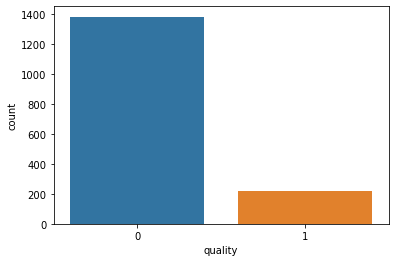

In [14]:
sns.countplot(wine['quality'], x="quality")

In [15]:
# separation of the datasets
X = wine.drop('quality', axis=1)
Y = wine['quality']

In [16]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 #
 test_train_size = 0.25
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)
 X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)
 X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)   

 print("X_train size=", X_train.shape)
 print("X_test size=", X_test.shape)   

X_train size= (399, 11)
X_test size= (400, 11)


In [17]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_scaled = sc.fit_transform(X)
#Y_scaled = sc.transform(Y)

In [51]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [52]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
X_train[:5]

array([[-0.52550438, -1.25653631, -0.18271179, -0.16501458, -0.40911056,
         1.94334254,  0.85080508, -0.42792636,  0.75821917, -0.1877573 ,
        -0.31296262],
       [ 0.02138202,  0.8295172 , -0.03403333, -0.33075609, -0.06396407,
        -0.41961196, -0.04546668,  0.45422589, -0.01816094, -0.71865215,
        -1.12265194],
       [ 2.31830492, -0.90396389,  1.65098923,  0.08359769, -0.12148849,
         1.54951679,  0.91719559,  1.47998432, -1.37682612,  0.46111418,
         0.0468993 ],
       [ 0.24013659,  1.35837584, -0.23227128, -0.16501458, -0.44746017,
        -0.61652483, -0.07866193, -0.21251709, -1.37682612, -0.60067552,
        -0.94272098],
       [ 0.02138202,  1.82847241, -1.27302051, -0.24788533, -0.33241134,
        -1.01035058, -1.00812894, -0.00736541,  0.0465374 , -0.42371057,
         0.49672669]])

In [19]:
# scaling using RobustScaler
r_sc = RobustScaler()
X_train_r = r_sc.fit_transform(X_train_r)
X_test_r = r_sc.transform(X_test_r)

In [20]:
X_train_raw[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0


**Decision Tree Classifier**

**Hyper Parameter Tuning**

In [54]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds = GridSearchCV(DecisionTreeClassifier(random_state=1), {
                                                    'criterion':('gini', 'entropy'),
                                                    'splitter': ('best', 'random'), 
                                                    'max_depth': [1,5,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50],
                                                    'ccp_alpha': [0.0001,0.001,0.01,0.1],
                                                    'max_features':('auto', 'sqrt', 'log2')
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_dct_grds.fit(X_train,Y_train)
#clf_dct_grds.fit(X,Y)
#clf_dct_grds.cv_results_
end_time = my_timer()
print("Decision Tree Grid Search Run time=", end_time-start_time)
print("Decision Tree Grid Search Results=", clf_dct_grds.cv_results_)


Decision Tree Grid Search Run time= 10.345614075893536
Decision Tree Grid Search Results= {'mean_fit_time': array([0.00914721, 0.00094948, 0.00114851, 0.00097775, 0.00195036,
       0.00097637, 0.00115328, 0.00103416, 0.00099297, 0.00096636,
       0.00103078, 0.00107446, 0.00121856, 0.00122128, 0.00133834,
       0.00099416, 0.00119548, 0.00099859, 0.00128517, 0.00132213,
       0.00108428, 0.00104775, 0.00097389, 0.00209641, 0.00190544,
       0.00219436, 0.00163169, 0.00136285, 0.00108929, 0.00104456,
       0.0013804 , 0.00109544, 0.00140662, 0.00112305, 0.00127149,
       0.00106831, 0.00128417, 0.00105128, 0.00108843, 0.00104156,
       0.00137639, 0.00150957, 0.00150619, 0.00106544, 0.00161691,
       0.00148888, 0.00149145, 0.0011518 , 0.00119638, 0.00124407,
       0.00147276, 0.00151181, 0.00155177, 0.00141468, 0.00161257,
       0.00121751, 0.00128822, 0.00100665, 0.00114756, 0.00107832,
       0.0021811 , 0.00200238, 0.00179901, 0.00156193, 0.00180969,
       0.00154352, 0.

In [55]:
df_dct = pd.DataFrame(clf_dct_grds.cv_results_)
df_dct

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009147,0.015667,0.000726,0.000534,0.0001,gini,1,auto,1,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
1,0.000949,0.000045,0.000411,0.000063,0.0001,gini,1,auto,1,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
2,0.001149,0.000177,0.000393,0.000032,0.0001,gini,1,auto,5,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
3,0.000978,0.000091,0.000349,0.000015,0.0001,gini,1,auto,5,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
4,0.001950,0.001415,0.000393,0.000028,0.0001,gini,1,auto,10,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.000987,0.000047,0.000377,0.000028,0.1,entropy,20,log2,10,random,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
956,0.001456,0.000457,0.000430,0.000115,0.1,entropy,20,log2,20,best,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
957,0.001372,0.000435,0.000436,0.000089,0.1,entropy,20,log2,20,random,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31
958,0.001184,0.000076,0.000385,0.000008,0.1,entropy,20,log2,50,best,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.85,0.85,0.85,0.85,0.848101,0.84962,0.000759,31


In [56]:
clf_dct_grds.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [57]:
clf_dct_grds.best_score_

0.8521202531645569

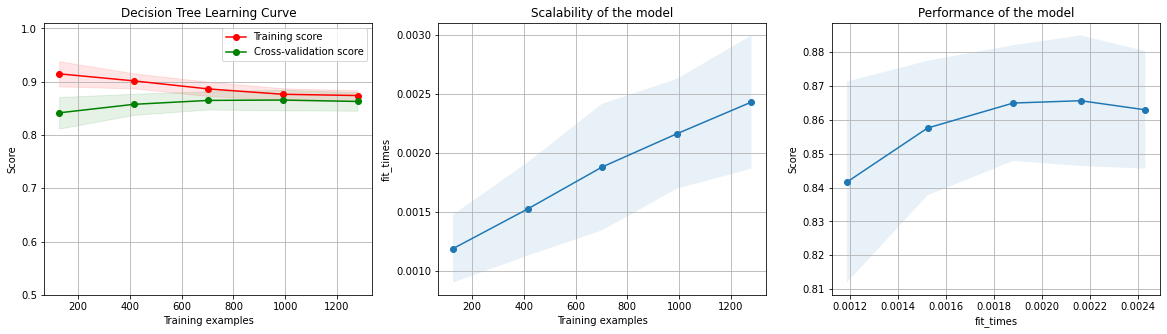

In [58]:
dct_best = clf_dct_grds.best_params_
dct_estimator = DecisionTreeClassifier(ccp_alpha=dct_best['ccp_alpha'],
                                       criterion=dct_best['criterion'],
                                       max_depth=dct_best['max_depth'],
                                       min_samples_leaf=dct_best['min_samples_leaf'],
                                       splitter=dct_best['splitter'],
                                       max_features=dct_best['max_features'])
dct_title = "Decision Tree Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(dct_estimator, dct_title, X_scaled, Y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.savefig("images/dct_grds_best_wine.png")
plt.show()

**Support Vector Machines Hyper Parameter Tuning**

In [65]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds = GridSearchCV(svm.SVC(random_state=1), {
                                                    'C': [1,5,10,20,25],
                                                    'kernel': ['rbf','linear', 'sigmoid'],
                                                    'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_svm_grds.fit(X_train,Y_train)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_svm_grds.cv_results_)


SVM Grid Search Run time= 2.553227205062285
SVM Grid Search Results= {'mean_fit_time': array([0.00281916, 0.00354743, 0.00243754, 0.00298924, 0.00340662,
       0.00248952, 0.00305605, 0.00349083, 0.00284672, 0.00300927,
       0.00350065, 0.00284171, 0.00411677, 0.00342197, 0.00286918,
       0.00276756, 0.00595455, 0.00245528, 0.00307455, 0.00598712,
       0.00258718, 0.00311861, 0.00596886, 0.0029892 , 0.00325494,
       0.00619111, 0.00301723, 0.00386887, 0.00618877, 0.00313478,
       0.00306678, 0.00930834, 0.00270457, 0.00301847, 0.00914335,
       0.00263653, 0.00320234, 0.00916643, 0.00312386, 0.00327735,
       0.00920424, 0.00281281, 0.00386319, 0.00910935, 0.00250101,
       0.0031877 , 0.01417522, 0.0026082 , 0.00312414, 0.01389155,
       0.00383072, 0.00336637, 0.01374259, 0.00285106, 0.00324821,
       0.01398826, 0.00288982, 0.00413604, 0.01390758, 0.00252209,
       0.00292792, 0.01696162, 0.00263019, 0.00324206, 0.01675301,
       0.00279126, 0.00323009, 0.01659465,

In [66]:
df_dct = pd.DataFrame(clf_svm_grds.cv_results_)
df_dct

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002819,0.000042,0.001410,0.000103,1,1e-05,rbf,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,33
1,0.003547,0.000850,0.000741,0.000041,1,1e-05,linear,"{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}",0.8500,0.8625,0.8500,0.8500,0.848101,0.852120,0.005242,26
2,0.002438,0.000078,0.000794,0.000061,1,1e-05,sigmoid,"{'C': 1, 'gamma': 1e-05, 'kernel': 'sigmoid'}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,33
3,0.002989,0.000095,0.001474,0.000118,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,33
4,0.003407,0.000806,0.000708,0.000085,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.8500,0.8625,0.8500,0.8500,0.848101,0.852120,0.005242,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.016693,0.005701,0.000743,0.000046,25,0.01,linear,"{'C': 25, 'gamma': 0.01, 'kernel': 'linear'}",0.8500,0.8625,0.8625,0.8500,0.848101,0.854620,0.006471,6
71,0.002955,0.000138,0.000761,0.000046,25,0.01,sigmoid,"{'C': 25, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.8250,0.8500,0.8125,0.8750,0.835443,0.839589,0.021569,69
72,0.004137,0.000279,0.001455,0.000062,25,0.1,rbf,"{'C': 25, 'gamma': 0.1, 'kernel': 'rbf'}",0.7875,0.8500,0.8625,0.8750,0.924051,0.859810,0.044022,4
73,0.016579,0.005751,0.000731,0.000018,25,0.1,linear,"{'C': 25, 'gamma': 0.1, 'kernel': 'linear'}",0.8500,0.8625,0.8625,0.8500,0.848101,0.854620,0.006471,6


In [67]:
clf_svm_grds.best_params_

{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}

In [68]:
clf_svm_grds.best_score_

0.8696202531645569

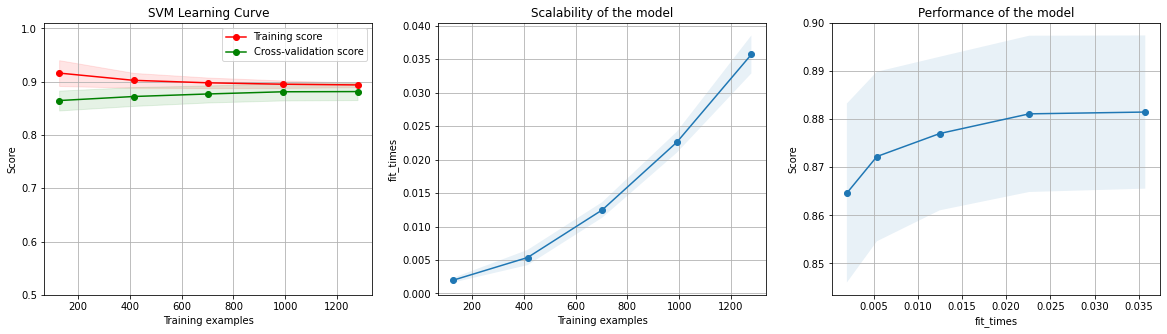

In [69]:
svm_best = clf_svm_grds.best_params_
svm_estimator = svm.SVC(C=svm_best['C'],
                        gamma=svm_best['gamma'],
                        kernel=svm_best['kernel'],
                        random_state=1)
svm_title = "SVM Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(svm_estimator, svm_title, X_scaled, Y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/svm_grds_best_wine.png")
plt.show()

**Neural Networks Hyper Parameter Tuning**

In [31]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
# https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# additional explanation about hidden layers:
# https://stackoverflow.com/questions/35363530/python-scikit-learn-mlpclassifier-hidden-layer-sizes
clf_nn_grds = GridSearchCV(MLPClassifier(random_state=0),{
                                                    'max_iter': [200, 500, 1000, 2000],
                                                    'solver': ['lbfgs','sgd','adam'],
                                                    'alpha':[0.00001, 0.0001, 0.001],
                                                    'power_t': [0.4,0.5, 0.6],
                                                    'activation':['identity','relu', 'tanh', 'logistic']  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_nn_grds.fit(X_train,Y_train)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("NN Grid Search Run time=", end_time-start_time)
print("NN Grid Search Results=", clf_nn_grds.cv_results_)

NN Grid Search Run time= 595.4495498349424
NN Grid Search Results= {'mean_fit_time': array([1.17228417, 1.69051995, 0.6611311 , 1.85929193, 0.7628818 ,
       2.03693576, 0.68342018, 1.84447217, 0.70653629, 2.02779083,
       0.81208816, 2.01000867, 0.74905081, 2.05494518, 0.70414777,
       1.92644234, 0.71074924, 1.78395   , 0.65676522, 1.84320431,
       0.81425819, 1.84507427, 0.67872553, 1.96073728, 0.67535267,
       1.8559516 , 0.67960615, 1.88474016, 0.66438961, 1.93950438,
       0.65867338, 1.89730024, 0.795786  , 1.86341705, 0.65587821,
       1.88426895, 0.44670129, 2.9075067 , 0.47998128, 2.81651945,
       0.53490353, 2.87326303, 0.45444055, 2.78582845, 0.44016275,
       2.83130779, 0.51446199, 2.8730289 , 0.44159703, 3.07489467,
       0.46317334, 2.9429955 , 0.45039973, 2.76683178, 0.46814985,
       2.85373378, 0.44680529, 2.87979517, 0.44329853, 2.75940957,
       0.45150919, 3.00569572, 0.46563954, 2.75381951, 0.43807688,
       2.87329702, 0.45924101, 2.74186339, 0

In [32]:
clf_nn_grds.best_params_

{'activation': 'tanh',
 'alpha': 1e-05,
 'max_iter': 2000,
 'power_t': 0.4,
 'solver': 'sgd'}

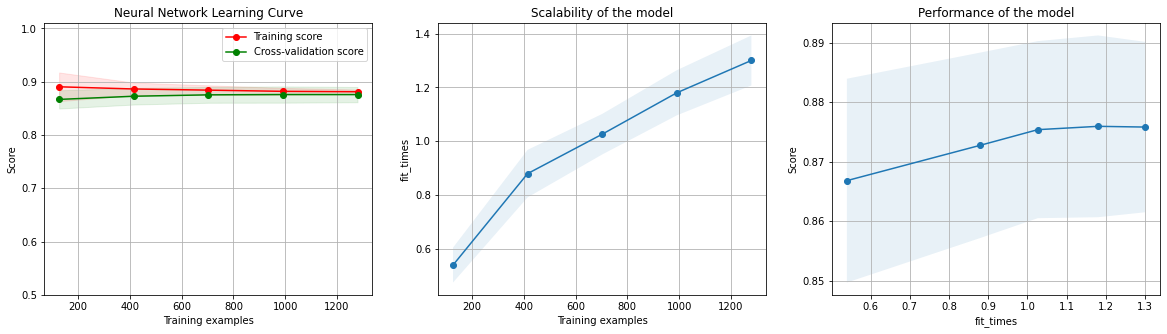

In [70]:
nn_best = clf_nn_grds.best_params_
nn_estimator = MLPClassifier(activation=nn_best['activation'],
                             alpha=nn_best['alpha'],
                             max_iter=nn_best['max_iter'],
                             power_t=nn_best['power_t'],
                             solver=nn_best['solver'],
                             random_state=1)
nn_title = "Neural Network Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(nn_estimator, nn_title, X_scaled, Y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/nn_grds_best_wine.png")
plt.show()

**Boosting Hyper Parameter Tuning**

In [34]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
# Use GridSearchCV
clf_boos_grds = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=1), {
                                                    'n_estimators': [10,50,100,200,300,500, 1000],
                                                    'learning_rate': [0.1,0.2,0.5, 1.0, 1.2, 1.5, 2.0]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_boos_grds.fit(X_train,Y_train)
end_time = my_timer()
print("Boosting Grid Search Run time=", end_time-start_time)
print("Boosting Grid Search Results=", clf_boos_grds.cv_results_)

Boosting Grid Search Run time= 144.7781852679327
Boosting Grid Search Results= {'mean_fit_time': array([0.02039351, 0.08500843, 0.18046799, 0.36354136, 0.52929354,
       0.88940091, 1.80893745, 0.01702347, 0.08476114, 0.16769505,
       0.35524421, 0.51451225, 0.84310622, 1.66810117, 0.01686497,
       0.08601074, 0.16709628, 0.33451443, 0.51975322, 0.86598577,
       1.73651137, 0.02168622, 0.08629432, 0.18820515, 0.3489038 ,
       0.53165054, 0.92323842, 1.77375927, 0.01807451, 0.08480859,
       0.16676707, 0.33710899, 0.49774156, 0.85697284, 1.72120285,
       0.01777859, 0.08533859, 0.16688356, 0.33952098, 0.50677476,
       0.83285527, 1.65849028, 0.0169909 , 0.08302898, 0.16491055,
       0.34322715, 0.50100021, 0.83771458, 1.69498816]), 'std_fit_time': array([0.00442257, 0.00259638, 0.01825063, 0.02195163, 0.01178123,
       0.02700584, 0.10074923, 0.00031882, 0.00164534, 0.00476676,
       0.00621043, 0.01040213, 0.0125215 , 0.01896051, 0.00022387,
       0.00491511, 0.00276

In [35]:
clf_boos_grds.best_params_

{'learning_rate': 1.0, 'n_estimators': 1000}

In [36]:
clf_boos_grds.best_score_

0.882246835443038

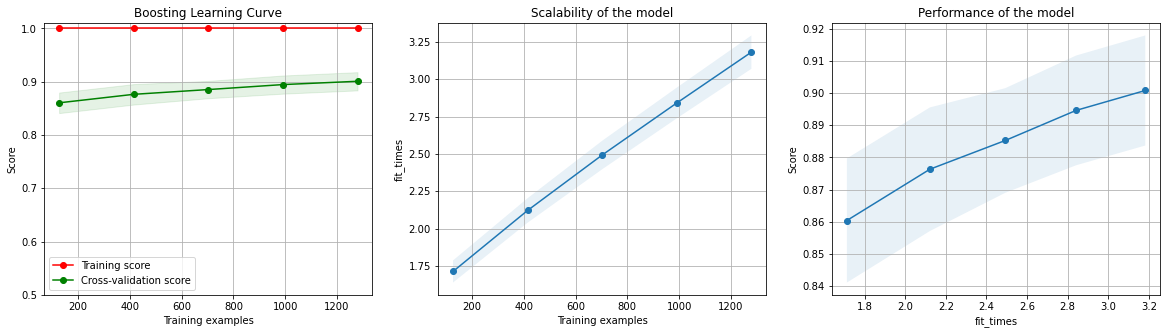

In [71]:
boos_best = clf_boos_grds.best_params_
boos_estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                   learning_rate=boos_best['learning_rate'], 
                                   n_estimators=boos_best['n_estimators'],
                                   random_state=1)
                
boos_title = "Boosting Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(boos_estimator, boos_title, X_scaled, Y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/boost_grds_best_wine.png")
plt.show()

**KNN Hyper Parameter Tuning**

In [38]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier 
# Use GridSearchCV
clf_knn_grds = GridSearchCV(KNeighborsClassifier(), {
                                                    'n_neighbors': [1,5,7,10,20],
                                                    'weights':['uniform', 'distance'],
                                                    'leaf_size': [1,2,5,10,20,30,40],
                                                    'algorithm':['ball_tree','kd_tree','brute'] 
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_knn_grds.fit(X_train,Y_train)
end_time = my_timer()
print("KNN Grid Search Run time=", end_time-start_time)
print("KNN Grid Search Results=", clf_knn_grds.cv_results_)

KNN Grid Search Run time= 4.377712532994337
KNN Grid Search Results= {'mean_fit_time': array([0.00236497, 0.00110292, 0.00098615, 0.00096312, 0.00087957,
       0.00101123, 0.00090861, 0.00086126, 0.00094123, 0.00092664,
       0.00096402, 0.00087113, 0.00089145, 0.00085363, 0.00095482,
       0.00096474, 0.00092859, 0.00089631, 0.00088019, 0.00086565,
       0.00101519, 0.00087161, 0.00089197, 0.00082269, 0.000842  ,
       0.00080514, 0.00100341, 0.00088215, 0.0008739 , 0.00083795,
       0.00093842, 0.00084805, 0.00095539, 0.00080748, 0.00083838,
       0.00080123, 0.00085306, 0.00083561, 0.00111113, 0.00086565,
       0.00105681, 0.00086446, 0.00080428, 0.00095191, 0.00079083,
       0.00077124, 0.00082541, 0.00092211, 0.00082669, 0.00077534,
       0.00080943, 0.00096221, 0.00097337, 0.0008287 , 0.00084281,
       0.0007813 , 0.00076222, 0.00078125, 0.00084295, 0.00077562,
       0.00075521, 0.00079851, 0.00074801, 0.00080218, 0.00085654,
       0.00080905, 0.0008225 , 0.00074725,

In [39]:
clf_knn_grds.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'weights': 'distance'}

In [40]:
clf_knn_grds.best_score_

0.864746835443038

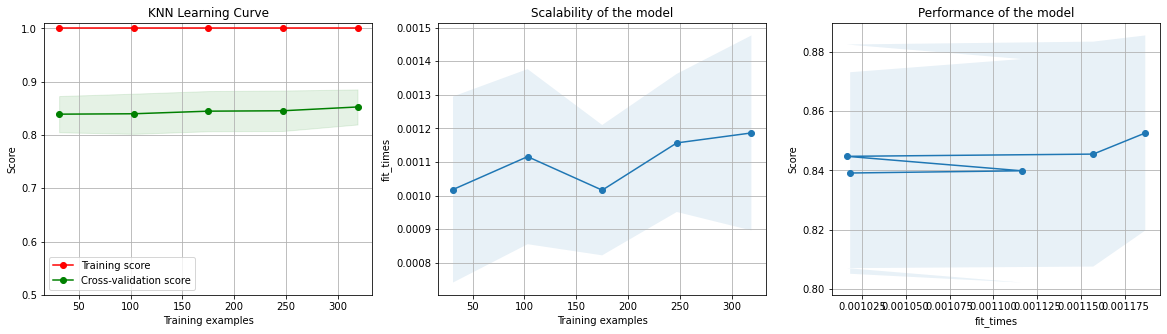

In [41]:
knn_best = clf_knn_grds.best_params_
knn_estimator = KNeighborsClassifier( n_neighbors=knn_best['n_neighbors'],
                                      weights=knn_best['weights'],
                                      leaf_size=knn_best['leaf_size'],
                                      algorithm=knn_best['algorithm']) 
                                
                
knn_title = "KNN Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(knn_estimator, knn_title, X_train, Y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/knn_grds_best_wine.png")
plt.show()